# Intro

## Librerías

In [1]:
# Data
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# ML metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optimización Inversa
from scipy.optimize import differential_evolution

In [2]:
REPO_NAME = "Multi-Parameter_Wireless_Network"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/MiguelMussi/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'Multi-Parameter_Wireless_Network'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 39 (delta 17), reused 16 (delta 4), pack-reused 0
Receiving objects: 100% (39/39), 724.80 KiB | 5.21 MiB/s, done.
Resolving deltas: 100% (17/17), done.


Establecer GPU por defecto en caso de estar disponible.

In [3]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


## DataFrame

In [4]:
# Leer el archivo de texto
with open('datos.txt', 'r') as file:
    data = file.read()

# Dividir los datos por líneas y luego por espacios
lines = data.strip().split('\n')
rows = [line.split() for line in lines]

# Convertir la lista de listas en un DataFrame
df = pd.DataFrame(rows)

# # Asignar nombres a las columnas
# df.columns = ['ID', 'Value1', 'Value2', 'Value3', 'Value4', ...]

# Convertir los datos a tipos numéricos
df = df.apply(pd.to_numeric)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,282
0,1,100,5,15,25,2,250,7,45,25,...,110,25,59,80,3,90,12,12.42,8.52,21.36
1,1,100,3,105,6,2,260,7,90,6,...,25,12,59,30,7,45,12,18.92,6.64,21.18
2,1,110,-3,45,12,2,250,7,45,25,...,65,12,59,30,13,110,6,12.63,6.59,17.89
3,1,100,3,105,6,2,270,3,105,6,...,25,25,59,70,15,110,25,11.07,9.36,22.05
4,1,100,3,105,6,2,280,11,15,12,...,25,6,59,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1,110,-5,90,6,2,250,7,45,25,...,65,25,59,80,5,45,6,13.07,7.71,19.45
746,1,80,-5,45,6,2,270,3,105,6,...,105,6,59,80,3,90,12,17.19,6.84,19.59
747,1,70,-1,25,25,2,260,11,110,6,...,110,25,59,80,-3,65,6,17.93,5.63,19.37
748,1,80,-5,45,6,2,260,-3,65,12,...,65,25,59,30,9,105,6,14.15,7.98,19.44


## Análisis Exploratorio

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 283 entries, 0 to 282
dtypes: float64(3), int64(280)
memory usage: 1.6 MB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,282
count,750.0,750.000000,750.000000,750.000000,750.000000,750.0,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.0,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.0,95.746667,2.888000,58.500000,13.081333,2.0,272.893333,4.904000,62.280000,14.548000,...,63.053333,15.760000,59.0,58.880000,5.101333,67.666667,12.716000,14.378480,7.379773,19.679573
std,0.0,22.693519,6.438224,36.008965,8.237143,0.0,18.350593,5.405961,33.116923,8.378382,...,36.312100,8.489906,0.0,21.257503,5.750521,37.270287,7.181651,3.623039,1.570285,2.609710
min,1.0,70.000000,-7.000000,15.000000,6.000000,2.0,250.000000,-5.000000,15.000000,6.000000,...,15.000000,6.000000,59.0,30.000000,-3.000000,15.000000,6.000000,4.720000,4.010000,13.200000
25%,1.0,70.000000,-3.000000,25.000000,6.000000,2.0,260.000000,3.000000,25.000000,6.000000,...,25.000000,6.000000,59.0,30.000000,-1.000000,25.000000,6.000000,11.765000,6.242500,17.890000
50%,1.0,90.000000,3.000000,45.000000,12.000000,2.0,270.000000,7.000000,65.000000,12.000000,...,65.000000,12.000000,59.0,60.000000,5.000000,65.000000,12.000000,14.190000,7.210000,19.740000
75%,1.0,110.000000,11.000000,105.000000,25.000000,2.0,300.000000,7.000000,90.000000,25.000000,...,105.000000,25.000000,59.0,80.000000,9.000000,105.000000,12.000000,16.835000,8.465000,21.395000
max,1.0,130.000000,13.000000,110.000000,25.000000,2.0,300.000000,13.000000,110.000000,25.000000,...,110.000000,25.000000,59.0,90.000000,15.000000,110.000000,25.000000,25.170000,13.410000,27.930000


## Renombrar columnas

In [8]:
df.columns

RangeIndex(start=0, stop=283, step=1)

In [9]:
def renombrar_columnas(df):
    df.columns = [f'{i+1}' for i in range(df.shape[1])]
    return df

In [10]:
df = renombrar_columnas(df)

In [11]:
df

,1,2,3,4,5,6,7,8,9,10,...,274,275,276,277,278,279,280,281,282,283
0,1,100,5,15,25,2,250,7,45,25,...,110,25,59,80,3,90,12,12.42,8.52,21.36
1,1,100,3,105,6,2,260,7,90,6,...,25,12,59,30,7,45,12,18.92,6.64,21.18
2,1,110,-3,45,12,2,250,7,45,25,...,65,12,59,30,13,110,6,12.63,6.59,17.89
3,1,100,3,105,6,2,270,3,105,6,...,25,25,59,70,15,110,25,11.07,9.36,22.05
4,1,100,3,105,6,2,280,11,15,12,...,25,6,59,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1,110,-5,90,6,2,250,7,45,25,...,65,25,59,80,5,45,6,13.07,7.71,19.45
746,1,80,-5,45,6,2,270,3,105,6,...,105,6,59,80,3,90,12,17.19,6.84,19.59
747,1,70,-1,25,25,2,260,11,110,6,...,110,25,59,80,-3,65,6,17.93,5.63,19.37
748,1,80,-5,45,6,2,260,-3,65,12,...,65,25,59,30,9,105,6,14.15,7.98,19.44


In [12]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '274', '275', '276', '277', '278', '279', '280', '281', '282', '283'],
      dtype='object', length=283)

## Filas Duplicadas

In [13]:
filas_duplicadas = df.duplicated().any()
num_duplicados = df.duplicated().sum()
print(f"Hay {num_duplicados} filas duplicadas.") if filas_duplicadas.any() else print("No hay filas duplicadas.")

Hay 150 filas duplicadas.


In [14]:
filas_duplicadas = df[df.duplicated()]
filas_duplicadas

,1,2,3,4,5,6,7,8,9,10,...,274,275,276,277,278,279,280,281,282,283
450,1,110,-3,45,12,2,270,11,65,25,...,25,12,59,80,1,15,12,7.58,12.40,22.28
451,1,90,13,25,6,2,260,11,110,6,...,25,6,59,40,5,110,25,10.72,5.91,14.39
452,1,70,1,65,25,2,260,7,90,6,...,110,25,59,90,13,25,12,15.05,7.38,19.94
453,1,70,1,65,25,2,250,5,45,12,...,110,25,59,70,5,15,25,13.31,7.56,20.83
454,1,90,5,45,12,2,300,7,90,6,...,25,6,59,70,15,110,25,11.98,7.17,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1,110,-5,90,6,2,250,7,45,25,...,65,25,59,80,5,45,6,13.07,7.71,19.45
746,1,80,-5,45,6,2,270,3,105,6,...,105,6,59,80,3,90,12,17.19,6.84,19.59
747,1,70,-1,25,25,2,260,11,110,6,...,110,25,59,80,-3,65,6,17.93,5.63,19.37
748,1,80,-5,45,6,2,260,-3,65,12,...,65,25,59,30,9,105,6,14.15,7.98,19.44


In [15]:
def eliminar_registros_duplicados(df):
    df_clean = df.drop_duplicates()
    return df_clean

In [16]:
df = eliminar_registros_duplicados(df)

In [17]:
df.shape

(600, 283)

## Train / Test

In [18]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [19]:
df_train.shape, df_test.shape

((480, 283), (120, 283))

## Normalización

In [20]:
def escalar_datos(df, scaler_dict=None):
    # Si no se proporciona un diccionario de scalers, inicializar uno
    if scaler_dict is None:
        scaler_dict = {}

    # Iterar sobre cada columna en el DataFrame
    for columna in df.columns:
        # Inicializar un scaler para cada columna si no está en el diccionario
        if columna not in scaler_dict:
            scaler_dict[columna] = MinMaxScaler()
        # Escalar la columna y reemplazar los valores en el DataFrame
        df[columna] = scaler_dict[columna].fit_transform(df[[columna]])

    # Devolver el DataFrame escalado y el diccionario de scalers
    return df, scaler_dict

In [21]:
df_train, train_scaler_dict = escalar_datos(df_train)

In [22]:
df_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,274,275,276,277,278,279,280,281,282,283
count,480.0,480.000000,480.000000,480.000000,480.000000,480.0,480.00000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.0,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.0,0.460764,0.497708,0.453289,0.364145,0.0,0.46375,0.548843,0.494627,0.458772,...,0.491776,0.504715,0.0,0.476042,0.453241,0.549123,0.350439,0.464178,0.356946,0.432051
std,0.0,0.378805,0.320775,0.381674,0.428674,0.0,0.36806,0.301258,0.343263,0.440725,...,0.378573,0.444154,0.0,0.355156,0.313571,0.393049,0.373154,0.174708,0.172003,0.176579
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.200000,0.105263,0.000000,0.0,0.20000,0.444444,0.105263,0.000000,...,0.105263,0.000000,0.0,0.000000,0.111111,0.105263,0.000000,0.340220,0.226862,0.303802
50%,0.0,0.500000,0.500000,0.315789,0.315789,0.0,0.40000,0.666667,0.526316,0.315789,...,0.526316,0.315789,0.0,0.500000,0.444444,0.526316,0.315789,0.452078,0.336702,0.436185
75%,0.0,0.833333,0.900000,0.947368,1.000000,0.0,1.00000,0.666667,0.789474,1.000000,...,0.947368,1.000000,0.0,0.833333,0.666667,0.947368,0.315789,0.581540,0.470479,0.551256
max,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Variables objetivo

In [23]:
def separar_Xy(df, columnas_target):
# def separar_Xy(df, cant_var_target):
    # POR NOMBRE
    X = df.drop(columnas_target, axis=1).copy()
    y = df[columnas_target].copy()

    # POR CANTIDAD
    # y = df.iloc[:, -cant_var_target:].copy()
    # X = df.iloc[:, :-cant_var_target].copy()

    return X, y

In [24]:
columnas_target = ['281', '282', '283']
# cant_var_target = 3

In [25]:
X_train, y_train = separar_Xy(df_train, columnas_target=columnas_target)
# X_train, y_train = separar_Xy(df_train, cant_var_target)

## Visualizaciones

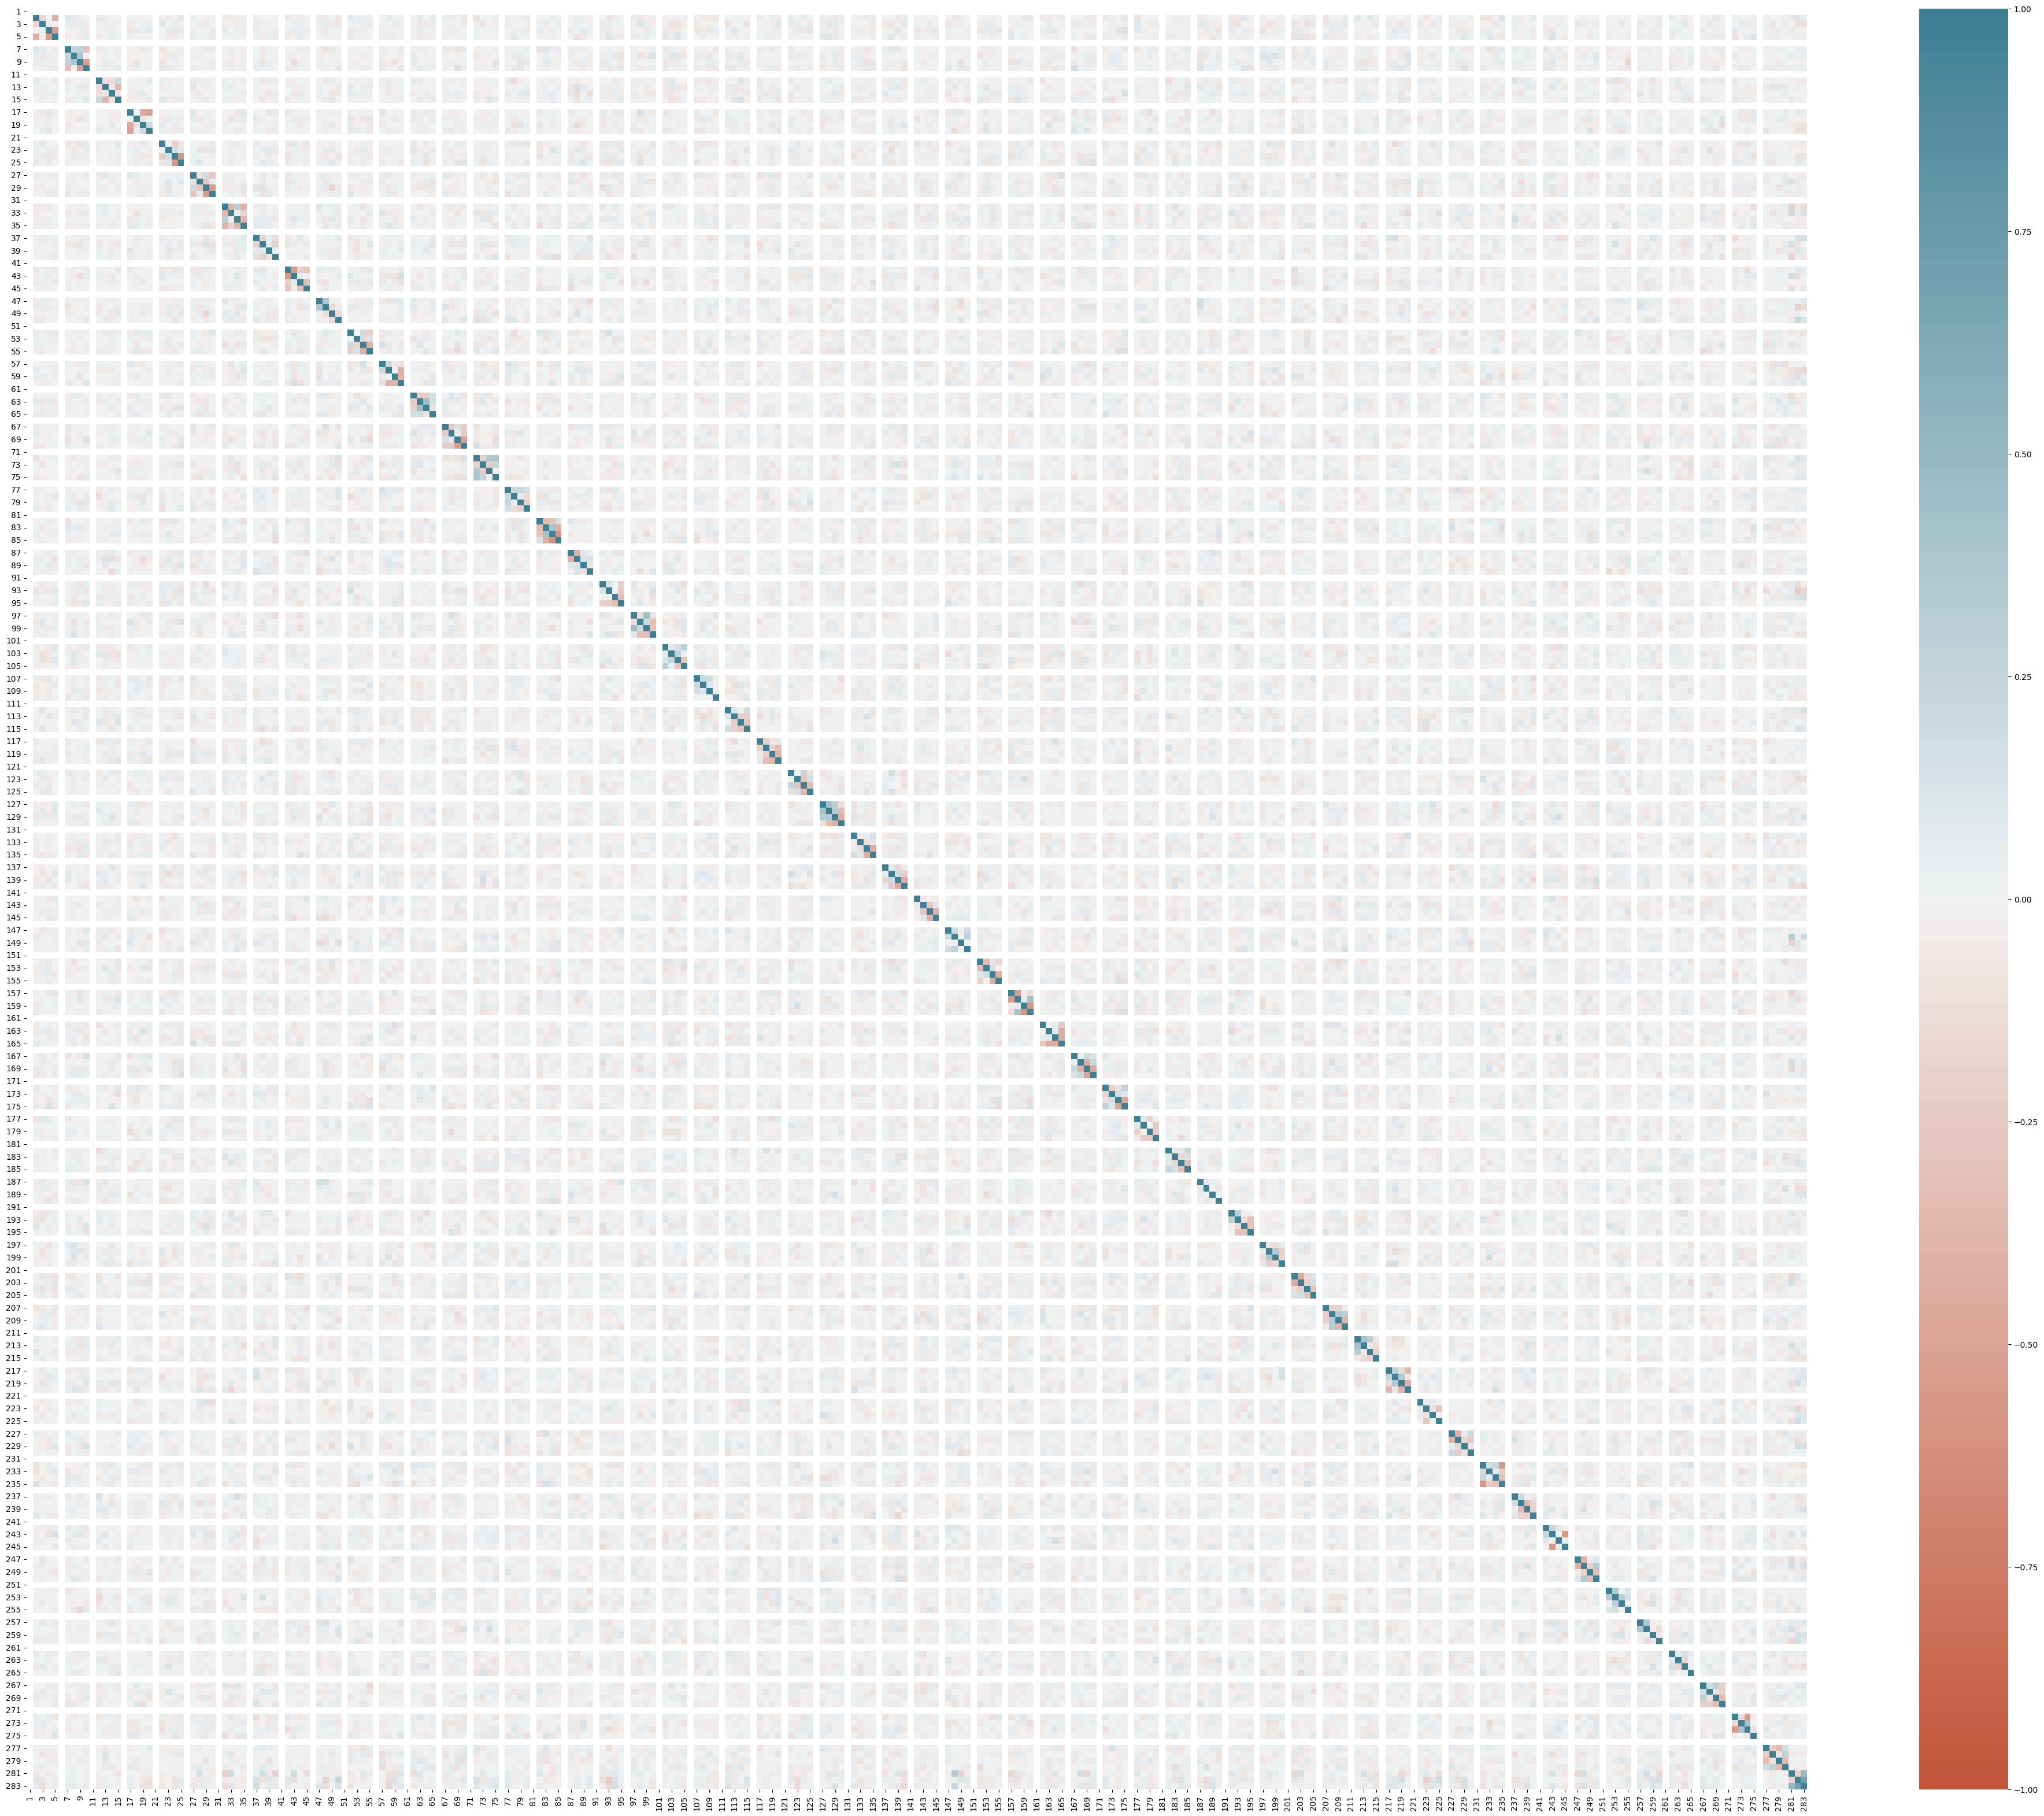

In [26]:
corr = df_train.corr()

plt.figure(figsize=(50, 40))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square = True,
    annot = False,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

# NN

## Test

In [27]:
df_test_out = df_test.copy()
df_test_out = renombrar_columnas(df_test_out)
df_test_out = eliminar_registros_duplicados(df_test_out)
df_test_out, _ = escalar_datos(df_test_out, train_scaler_dict)

In [28]:
X_test, y_test = separar_Xy(df_test_out, columnas_target=columnas_target)
# X_test, y_test = separar_Xy(df_test_out, cant_var_target)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((480, 280), (480, 3), (120, 280), (120, 3))

## Modelo

In [66]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(128, activation='relu'), Dropout(0.2),
    Dense(64, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 256)               71936     
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)               

In [68]:
# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=20,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

# Definir el número de características (p) para calcular R2 ajustado
p = X_train.shape[1]

history = model.fit(X_train, y_train, epochs=500, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)
print("-------------------------\nFin del Entrenamiento")

Inicio del Entrenamiento
-------------------------
Epoch 1/500
6/6 [==============================] - 2s 42ms/step - loss: 0.1541 - mean_squared_error: 0.1541 - mae: 0.3175 - val_loss: 0.0438 - val_mean_squared_error: 0.0438 - val_mae: 0.1632 - lr: 0.0010
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0956 - mean_squared_error: 0.0956 - mae: 0.2480 - val_loss: 0.0862 - val_mean_squared_error: 0.0862 - val_mae: 0.2448 - lr: 0.0010
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0801 - mean_squared_error: 0.0801 - mae: 0.2264 - val_loss: 0.0513 - val_mean_squared_error: 0.0513 - val_mae: 0.1808 - lr: 0.0010
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0608 - mean_squared_error: 0.0608 - mae: 0.1968 - val_loss: 0.0556 - val_mean_squared_error: 0.0556 - val_mae: 0.1890 - lr: 0.0010
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0567 - mean_squared_error: 0.0567 - mae: 0.1902 - val_loss

In [69]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [70]:
y_pred

array([[0.4693331 , 0.2510843 , 0.33917257],
       [0.3158293 , 0.3958425 , 0.3794134 ],
       [0.6469021 , 0.19631284, 0.4161166 ],
       [0.44900995, 0.43372688, 0.5032263 ],
       [0.45216691, 0.38556653, 0.46380374],
       [0.48672456, 0.20827925, 0.30913976],
       [0.36389035, 0.39185655, 0.40255746],
       [0.4517095 , 0.2682885 , 0.34040755],
       [0.3795728 , 0.4539424 , 0.45859593],
       [0.40259928, 0.41671157, 0.4475569 ],
       [0.48143354, 0.41707236, 0.5053685 ],
       [0.23419693, 0.41476408, 0.35631707],
       [0.2838794 , 0.32498452, 0.29997265],
       [0.46175903, 0.45961308, 0.52960396],
       [0.3882243 , 0.33106738, 0.34972024],
       [0.4212052 , 0.49598852, 0.52580345],
       [0.55347466, 0.35665613, 0.5172784 ],
       [0.4493264 , 0.38438356, 0.4613287 ],
       [0.42803884, 0.25086433, 0.30080092],
       [0.27996042, 0.3251927 , 0.2956505 ],
       [0.35509497, 0.42619693, 0.42665952],
       [0.4545104 , 0.40121672, 0.47056025],
       [0.

## Métricas

In [55]:
def r2_ajustado(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    r2_aj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return r2_aj

Mean Squared Error (MSE): 0.04
Mean Absolute Error (MAE): 0.16
R2 Score: 0.08
R2 Ajustado: 1.68



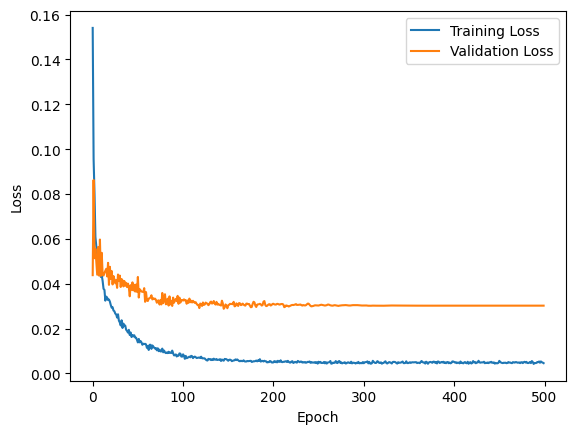

In [71]:
# Calcular R2 ajustado
n = len(y_test)
r2_aj = r2_ajustado(y_test, y_pred, n, p)

# Métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R2 Score: {:.2f}".format(r2))
print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predicciones

In [72]:
df_test

,1,2,3,4,5,6,7,8,9,10,...,274,275,276,277,278,279,280,281,282,283
367,1,90,5,45,12,2,250,5,45,12,...,25,6,59,90,-3,65,12,15.91,7.71,20.21
54,1,70,1,65,25,2,270,3,105,6,...,90,6,59,80,5,45,6,14.91,6.44,18.57
597,1,70,13,105,6,2,260,-5,45,6,...,65,25,59,80,-3,65,6,21.34,7.25,23.99
348,1,130,1,25,12,2,260,11,110,6,...,15,25,59,70,15,110,25,14.74,9.61,23.63
400,1,110,-3,45,12,2,270,11,65,25,...,25,12,59,80,1,15,12,7.58,12.40,22.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,1,80,-5,45,6,2,280,-5,25,6,...,105,6,59,40,5,110,25,8.80,5.96,14.51
15,1,80,-5,45,6,2,260,7,25,25,...,25,12,59,40,5,110,25,16.74,7.34,20.39
532,1,110,-3,45,12,2,250,5,45,12,...,25,25,59,60,5,105,6,10.73,8.09,18.58
507,1,70,13,105,6,2,270,3,105,6,...,25,12,59,70,15,110,25,11.70,10.27,22.10


In [73]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['281', '282', '283']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1,2,3,4,5,6,7,8,9,10,...,277,278,279,280,281,282,283,P_281,P_282,P_283
367,1,90,5,45,12,2,250,5,45,12,...,90,-3,65,12,15.91,7.71,20.21,14.967623,6.715730,18.081488
54,1,70,1,65,25,2,270,3,105,6,...,80,5,45,6,14.91,6.44,18.57,12.302797,7.814445,18.505222
597,1,70,13,105,6,2,260,-5,45,6,...,80,-3,65,6,21.34,7.25,23.99,18.050220,6.300014,18.891708
348,1,130,1,25,12,2,260,11,110,6,...,70,15,110,25,14.74,9.61,23.63,14.614813,8.101987,19.808973
400,1,110,-3,45,12,2,270,11,65,25,...,80,1,15,12,7.58,12.40,22.28,14.669618,7.736450,19.393854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,1,80,-5,45,6,2,280,-5,25,6,...,40,5,110,25,8.80,5.96,14.51,14.836617,7.142157,18.611790
15,1,80,-5,45,6,2,260,7,25,25,...,40,5,110,25,16.74,7.34,20.39,15.164836,7.396088,19.180384
532,1,110,-3,45,12,2,250,5,45,12,...,60,5,105,6,10.73,8.09,18.58,14.133805,7.582565,18.862749
507,1,70,13,105,6,2,270,3,105,6,...,70,15,110,25,11.70,10.27,22.10,13.745398,8.707380,19.971907


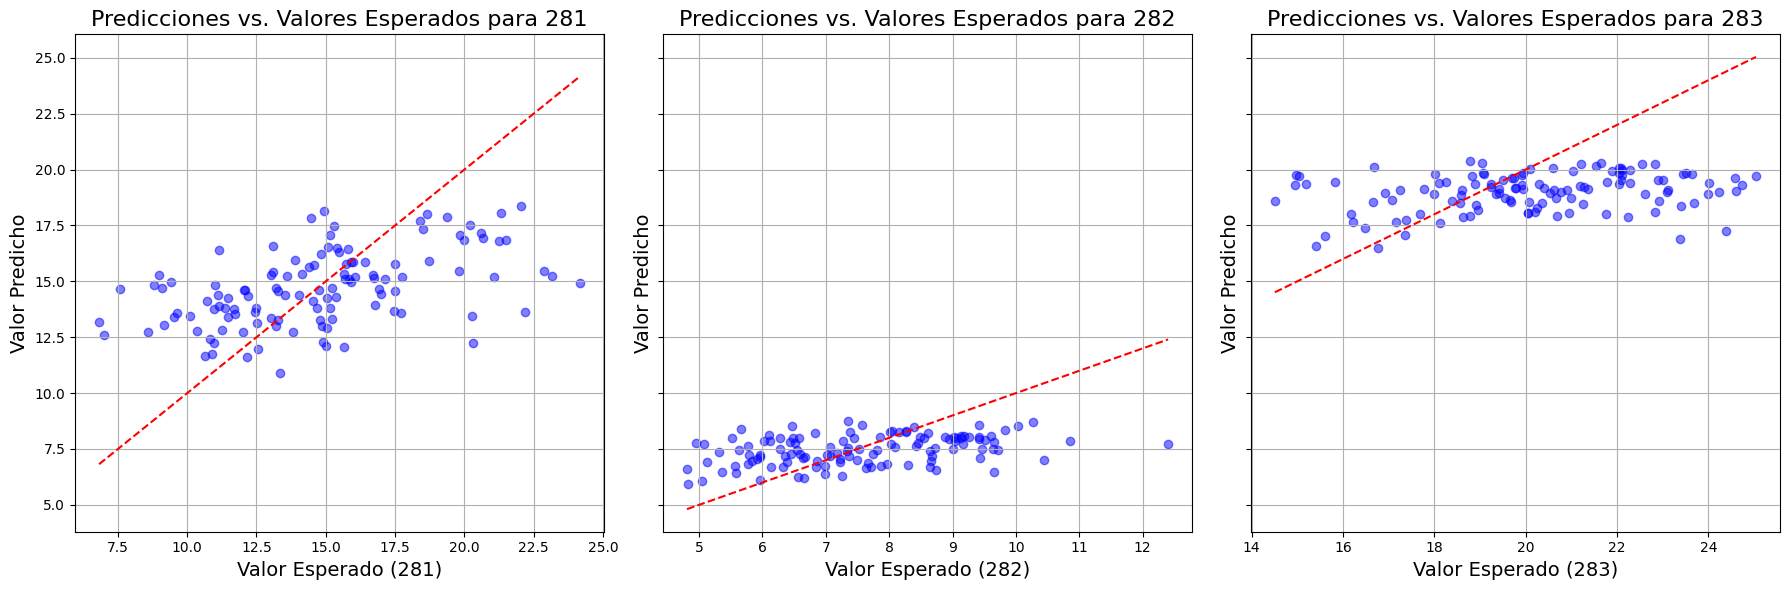

In [74]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['281', '282', '283']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Optimización Inversa

In [ ]:
# Función objetivo para la optimización inversa
def funcion_objetivo(inputs):
    # Reescalar las entradas a sus valores originales
    inputs_rescaled = train_scaler_dict['281'].inverse_transform(inputs.reshape(1, -1))

    # Hacer predicciones con el modelo
    y_pred = model.predict(inputs_rescaled)

    # Calcular la suma de las salidas de las variables 281, 282 y 283
    suma_salidas = np.sum(y_pred[:, [0, 1, 2]])

    # Devolver el negativo de la suma para que minimice la función objetivo
    return -suma_salidas

# Definir límites para las entradas a las 280 características
limites_entradas = [(0, 1)] * 280  # Suponemos que las entradas están normalizadas entre 0 y 1

# Realizar la optimización utilizando algoritmo genético (differential evolution)
resultado_optimizacion = differential_evolution(funcion_objetivo, bounds=limites_entradas, strategy='best1bin', maxiter=100, popsize=10)

# Las entradas óptimas que maximizan la función objetivo
entradas_optimas = resultado_optimizacion.x

# Imprimir las entradas óptimas
print("Entradas óptimas:")
print(entradas_optimas)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
1/1 [==============================] - ETA: 0s

In [ ]:
# Reescalar las entradas óptimas a su forma original
entradas_optimas_rescaled = train_scaler_dict['281'].inverse_transform(entradas_optimas.reshape(1, -1))

# Imprimir las entradas óptimas reescaladas
print("Entradas óptimas reescaladas:")
print(entradas_optimas_rescaled)